# PROJECT TITLE:-
  Classification Model- Build a Model that Classifies the Side Effects of a Drug

# Project Description:-
       
  The objective of this project is to build a classification model that classifies the side effects of a particular drug by age, gender and race.

In [1]:
#importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the dataset into python environment

In [2]:
#reading the data into python environment
data=pd.read_csv(r'C:\Users\DELL\Downloads\webmd.csv')
#displaying the data
data

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


* There are 362806 rows and 12 columns.

###### Data Dictionary

   * Age (numerical): age group range of user
   * Condition (categorical): name of condition
   * Date (date): date of review entry
   * Drug (categorical): name of drug
   * DrugId (numerical): drug id
   * EaseOfUse (numerical): 5 star rating
   * Effectiveness (numerical): 5 star rating
   * Review (text): patient review
   * Satisfaction (numerical): 5 star rating
   * Sex (categorical): gender of user
   * Side (text): side effects associated with drug (if any)
   * UsefulCount (numerical): number of users who found review useful.



The dataset provides user reviews on specific drugs along with related conditions, side effects, age, sex, and ratings reflecting overall patient satisfaction.

## I. Data Preprocessing

### Checking the basic details of the dataset

In [3]:
#displaying the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [4]:
data.describe().T # checking the statistical values

,count,mean,std,min,25%,50%,75%,max
DrugId,362806.0,36879.370774,52624.412971,1.0,4896.0,9548.0,63522.0,178546.0
EaseofUse,362806.0,4.019829,1.317711,1.0,3.0,5.0,5.0,10.0
Effectiveness,362806.0,3.532061,1.455961,1.0,3.0,4.0,5.0,10.0
Satisfaction,362806.0,3.135408,1.611106,1.0,1.0,3.0,5.0,10.0
UsefulCount,362806.0,6.744916,9.324240,0.0,1.0,4.0,9.0,255.0


In [5]:
#checking the missing values
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [6]:
data.nunique()# finding the unique values in the columns

Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250167
Satisfaction          7
Sex                   3
Sides              1651
UsefulCount         148
dtype: int64

### Checking the unique values of columns

In [7]:
for i in data.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in Age are :
45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64
**************************************************
Unique values in Condition are :
Other                                                  49765
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect 

* Majority of the patients is in the age group 45-54
* Ease of use and effectiveness of drugs are given 5 rating by most of the patients


### 1. Fill in all the missing values present in all the columns in the dataset

In [8]:
data.isnull().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

Only one column 'Reviews' has the missing values.

In [9]:
data=data.dropna() #Filling missing values

In [10]:
data.isnull().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

### 2. Checking and handling outliers

In [11]:
#Finding the 25th percentile and 75th percentiles.
Q1 = data.quantile(0.25)             
Q3 = data.quantile(0.75)

 #Inter Quantile Range (75th perentile - 25th percentile)
IQR = Q3 - Q1                          

#Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower_limit=Q1-1.5*IQR                        
upper_limit=Q3+1.5*IQR

#Finding the sum of the outliers in each column of int and float types.
((data.select_dtypes(include=['float64','int64'])<lower_limit) | (data.select_dtypes(include=['float64','int64'])>upper_limit)).sum()

DrugId           29795
EaseofUse            1
Effectiveness        1
Satisfaction         0
UsefulCount      23247
dtype: int64

Outliers are present in four columns. 

But for 'DrugId' and 'UsefulCount', the number of outliers is very large. Its removal will affect our data problem. 

Hence we deal only with columns 'EaseofUse' and 'Effectiveness'. 

#### i.checking the outlier in 'EaseofUse' column

Text(0.5, 1.0, 'Box plot  of EaseofUse  (before handling outliers)')

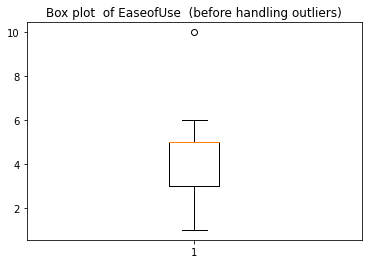

In [12]:
plt.boxplot(data['EaseofUse'])
plt.title('Box plot  of EaseofUse  (before handling outliers)')

In [13]:
# finding index of outliers 
index_of_outliers=data.loc[data['EaseofUse'].gt(upper_limit['EaseofUse'])| data['EaseofUse'].lt(lower_limit['EaseofUse']) ].index
print('index_of_outliers of EaseofUse\n')
print(index_of_outliers)


index_of_outliers of EaseofUse

Int64Index([273577], dtype='int64')


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0.5, 1.0, 'Box plot  of EaseofUse  (after handling outliers)')

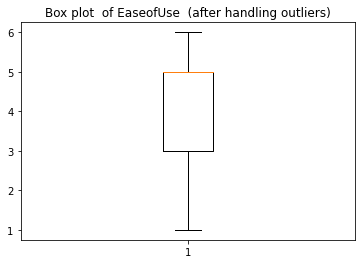

In [14]:
#removing outliers


data.drop(index=data.loc[data['EaseofUse'].gt(upper_limit['EaseofUse'])| data['EaseofUse'].lt(lower_limit['EaseofUse'])].index,inplace=True)

#displaying the data
plt.boxplot(data['EaseofUse'])
plt.title('Box plot  of EaseofUse  (after handling outliers)')

* All the outliers are removed from EaseofUse.

#### ii. checking 'Effectiveness' column

Text(0.5, 1.0, 'Box plot  of Effectiveness  (before handling outliers)')

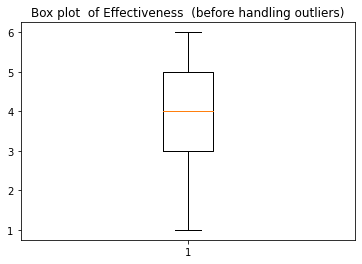

In [15]:
plt.boxplot(data['Effectiveness'])
plt.title('Box plot  of Effectiveness  (before handling outliers)')

In [16]:
# finding index of outliers 
index_of_outliers=data.loc[data['Effectiveness'].gt(upper_limit['Effectiveness'])| data['Effectiveness'].lt(lower_limit['Effectiveness']) ].index
print('index_of_outliers of Effectiveness\n')
print(index_of_outliers)


index_of_outliers of Effectiveness

Int64Index([], dtype='int64')


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0.5, 1.0, 'Box plot  of Effectiveness  (after handling outliers)')

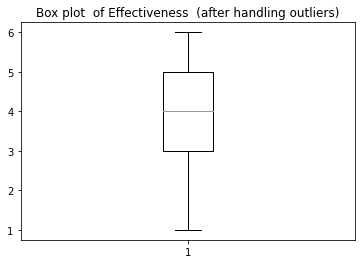

In [17]:
#removing outliers


data.drop(index=data.loc[data['Effectiveness'].gt(upper_limit['Effectiveness'])| data['Effectiveness'].lt(lower_limit['Effectiveness'])].index,inplace=True)

#displaying the data
plt.boxplot(data['Effectiveness'])
plt.title('Box plot  of Effectiveness  (after handling outliers)')

* All the outliers are removed from Effectiveness.

#### Correlation matrix and pairplot

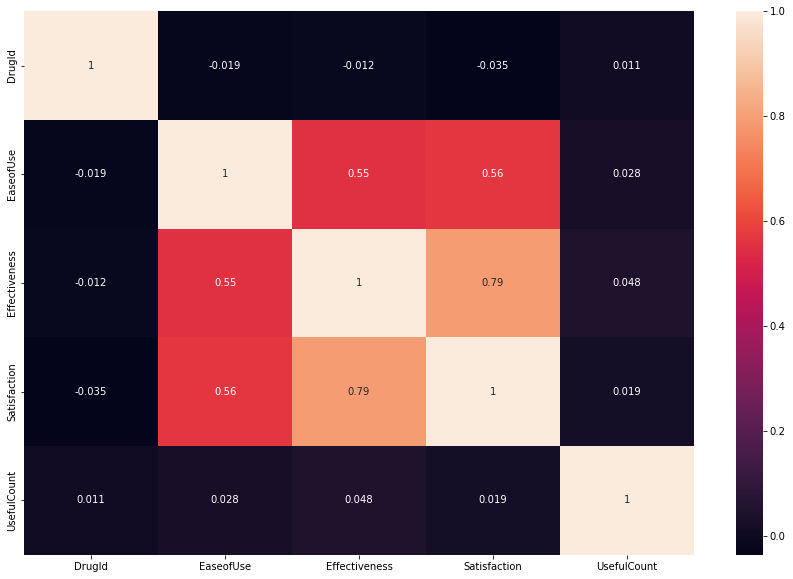

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

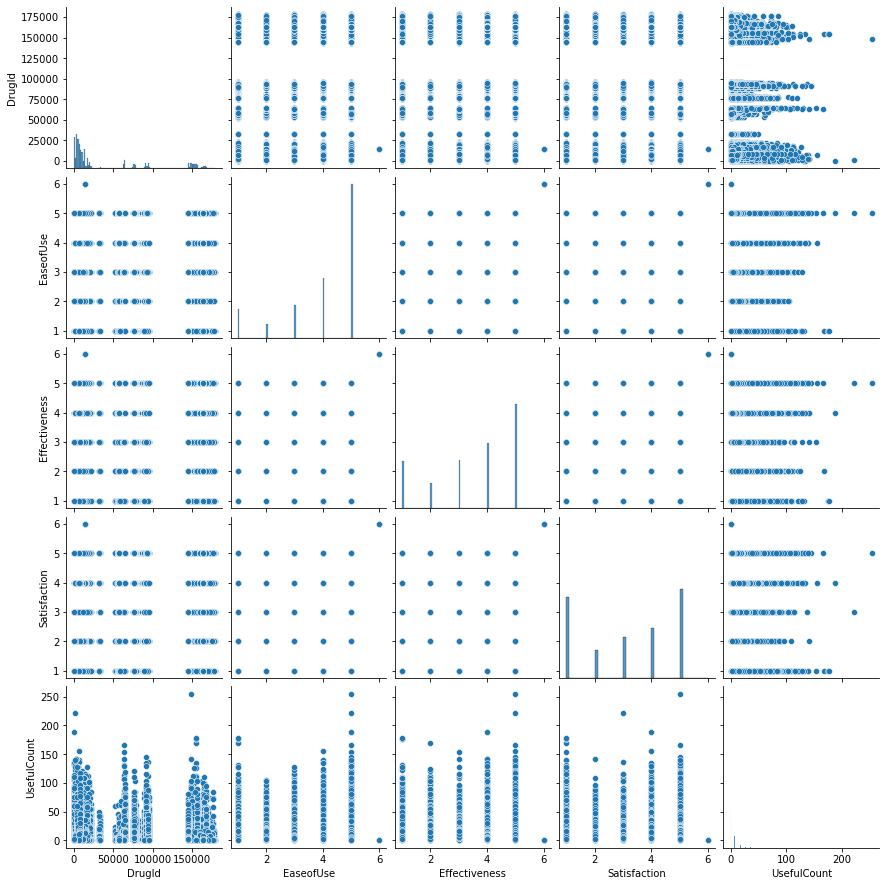

In [19]:
sns.pairplot(data)

### 3.Encoding

In [20]:
category_columns = ['Age','Date','Reviews','Condition','Drug', 'Sex', 'Sides']
data[category_columns] = data[category_columns].astype('category')
data.info()

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 362768 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Age            362768 non-null  category
 1   Condition      362768 non-null  category
 2   Date           362768 non-null  category
 3   Drug           362768 non-null  category
 4   DrugId         362768 non-null  int64   
 5   EaseofUse      362768 non-null  int64   
 6   Effectiveness  362768 non-null  int64   
 7   Reviews        362768 non-null  category
 8   Satisfaction   362768 non-null  int64   
 9   Sex            362768 non-null  category
 10  Sides          362768 non-null  category
 11  UsefulCount    362768 non-null  int64   
dtypes: category(7), int64(5)
memory usage: 40.1 MB


In [21]:
# Performing label encoding to the categorical variables.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['Age','Date','Reviews','Condition','Drug', 'Sex', 'Sides']
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])
data.head()

C:\Users\DELL\AppData\Local\Temp/ipykernel_16060/1881894366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])


,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,11,1595,4317,4,146724,5,5,128864,5,2,413,0
1,4,423,55,4,146724,5,5,214157,5,1,413,1
2,9,1183,3502,6866,144731,2,3,248797,3,1,0,0
3,11,1183,4339,6866,144731,2,2,25014,1,1,0,0
4,6,1183,352,6866,144731,1,1,157693,1,2,0,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362768 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Age            362768 non-null  int32
 1   Condition      362768 non-null  int32
 2   Date           362768 non-null  int32
 3   Drug           362768 non-null  int32
 4   DrugId         362768 non-null  int64
 5   EaseofUse      362768 non-null  int64
 6   Effectiveness  362768 non-null  int64
 7   Reviews        362768 non-null  int32
 8   Satisfaction   362768 non-null  int64
 9   Sex            362768 non-null  int32
 10  Sides          362768 non-null  int32
 11  UsefulCount    362768 non-null  int64
dtypes: int32(7), int64(5)
memory usage: 34.4 MB


### 4.Feature Reduction

In [23]:
# Dropping columns 'Date', 'Reviews' and 'UsefulCount', since they do not provide any useful information for our analysis
X=data.drop(['Sides','Date','Reviews','UsefulCount'],axis=1)
y=data['Sides']

### II. EXPLORATORY DATA ANALYSIS

### 1.UNIVARIATE ANALYSIS

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sex')

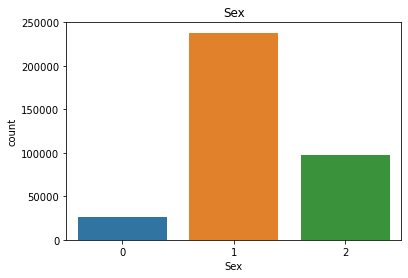

In [24]:
sns.countplot(data['Sex'])
plt.title('Sex')

Gender:The number of female patients is very large in compared to men and others.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Effectiveness')

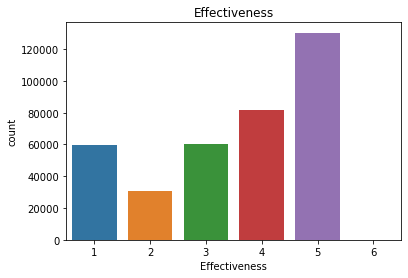

In [25]:
sns.countplot(data['Effectiveness'])
plt.title('Effectiveness')

Most of the patients had given five star rating for effectiveness. Hence drugs are successively effected in many patients.

### 2.MULTIVARIATE ANALYSIS

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sex VS Effectiveness')

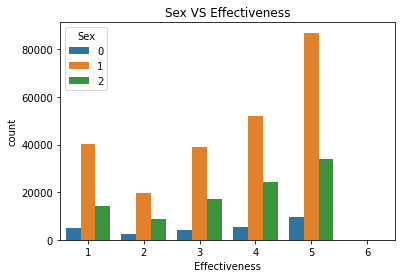

In [26]:
sns.countplot(data['Effectiveness'],hue=data['Sex'])
plt.title('Sex VS Effectiveness')

Since female is more in number, the rating also depends on them. All the genders are satisfied with drugs' effectiveness, since height of 5 star rating's graph is large.

## III. PREDICTIVE MODELLING

In [57]:
# Already splitted the dataset into input and output sets

In [ ]:
# X = data.drop(['Sides', 'Date','Reviews', 'UsefulCount'],axis=1) # X is the input set
y = data['Sides']   # y is the target

In [29]:
X.shape

(362768, 8)

In [30]:
y.shape

(362768,)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score
from sklearn.metrics import plot_confusion_matrix

### (i) KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# Identifty the best values for n_neighbors
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    kncdf = KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    model = kncdf.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc_values.append(accuracy_score(y_test, predictions))
    
acc_values

[0.9604294732199465,
 0.9565427130137553,
 0.9578796482619841,
 0.9533450946880944,
 0.9533864432009262,
 0.9489208038150895,
 0.948162747746506,
 0.9449651294208452,
 0.9429804008049177,
 0.9400308735562478,
 0.9389144637097886,
 0.9364473357774898]

Text(0, 0.5, 'Accuracy')

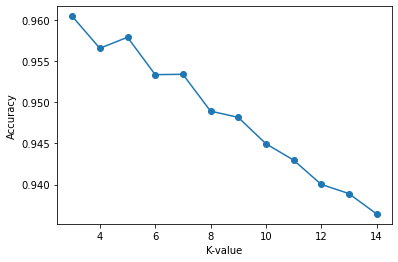

In [35]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel("K-value")
plt.ylabel("Accuracy")

In [36]:
#kncdf = KNeighborsClassifier(leaf_size=1,n_neighbors=5,metric="minkowski",p=1)
#model = kncdf.fit(X_train,y_train)
#predictions = model.predict(X_test)
#plot_confusion_matrix(kncdf, X_test, y_test)
#print(classification_report(y_test, predictions))

In [37]:
kncdf=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
kncdf.fit(X_train,y_train)
y_pred=kncdf.predict(X_test)

In [38]:
print("Accuracy is:",accuracy_score(y_test,predictions))

Accuracy is: 0.9364473357774898


In [39]:
confusion_matrix(y_test,predictions)

array([[3095,    0,    0, ...,    0,    0,    0],
       [   0,    3,    0, ...,    0,    0,    0],
       [   0,    0,    5, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,   15,    0],
       [   0,    0,    0, ...,    0,    0,   14]], dtype=int64)

In [40]:
data.describe

<bound method NDFrame.describe of         Age  Condition  Date  Drug  DrugId  EaseofUse  Effectiveness  Reviews  \
0        11       1595  4317     4  146724          5              5   128864   
1         4        423    55     4  146724          5              5   214157   
2         9       1183  3502  6866  144731          2              3   248797   
3        11       1183  4339  6866  144731          2              2    25014   
4         6       1183   352  6866  144731          1              1   157693   
...     ...        ...   ...   ...     ...        ...            ...      ...   
362801    8       1586   869  1244  144470          5              5   109991   
362802    0       1183   869  1244  144470          2              3   154756   
362803    4       1586   856  1244  144470          2              4    11806   
362804    8       1586   856  1244  144470          5              5   174828   
362805    7       1586   843  1244  144470          4              5   1651

### (ii) Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt_model=DecisionTreeClassifier()

In [43]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred = dt_model.predict(X_test)

In [45]:
print("accuracy on Decision tree model is :",accuracy_score(y_test,y_pred))

accuracy on Decision tree model is : 0.9885740276208066


In [46]:
y_test.value_counts()

0       3527
965     3076
1044    2494
325     1827
479     1511
        ... 
467        1
743        1
186        1
377        1
1447       1
Name: Sides, Length: 1393, dtype: int64

In [47]:
confusion_matrix(y_test,predictions)

array([[3095,    0,    0, ...,    0,    0,    0],
       [   0,    3,    0, ...,    0,    0,    0],
       [   0,    0,    5, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,   15,    0],
       [   0,    0,    0, ...,    0,    0,   14]], dtype=int64)

### (iii) Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_model=RandomForestClassifier(class_weight='balanced', random_state=1, max_depth=5, \
                               n_estimators=500, max_features=1)

In [50]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=1,
                       n_estimators=500, random_state=1)

In [51]:
predictions = rf_model.predict(X_test)

In [52]:
print("accuracy on Random Forest model is :",accuracy_score(y_test,predictions))

accuracy on Random Forest model is : 0.015078424346004355


### (iv) Logistic Regression

In [53]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
X,y=make_classification(n_samples=1000,n_features=10,n_informative=5,n_redundant=5,n_classes=3,random_state=1)
model=LogisticRegression(multi_class='multinomial',solver='lbfgs')
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores=cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=1)
print('Mean Accuracy:%.3f(%.3f)'%(mean(n_scores),std(n_scores)))

Mean Accuracy:0.681(0.042)


**Among all the models, Decision Tree Classifier provides high accuracy.** 

## IV. TUNING - KNN

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,5))
n_neighbors = list(range(3,4))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()

In [60]:
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print("Best leaf_size:", best_model.best_estimator_.get_params()['leaf_size'])
print("Best p:", best_model.best_estimator_.get_params()['p'])
print("Best n_neighbors:", best_model.best_estimator_.get_params()['n_neighbors'])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best leaf_size: 4
Best p: 1
Best n_neighbors: 3


In [62]:
kncdf = KNeighborsClassifier(leaf_size=4, n_neighbors=3, metric="minkowski", p=1)
model = kncdf.fit(X_train, y_train)
predictions = model.predict(X_test)

In [63]:
print("Accuracy is:", accuracy_score(y_test,predictions))

Accuracy is: 0.964343799101359


**Hence, we can find the performance of KNN Algorithm is improved after Hyper parameter tuning (GridSearchCV).**